In [1]:
import numpy as np
import os
np.set_printoptions(threshold=np.inf, precision=4)
import matplotlib.pyplot as plt
import cv2

from skimage.transform import resize, pyramid_reduce
import sys
import time

from skimage import io
import pprint

In [2]:
def show_images(images, cols = 1, titles = None):
    """Display a list of images in a single figure with matplotlib.
    
    Parameters
    ---------
    images: List of np.arrays compatible with plt.imshow.
    
    cols (Default = 1): Number of columns in figure (number of rows is 
                        set to np.ceil(n_images/float(cols))).
    
    titles: List of titles corresponding to each image. Must have
            the same length as titles.
    """
    assert((titles is None)or (len(images) == len(titles)))
    n_images = len(images)
    if titles is None: titles = ['Image (%d)' % i for i in range(1,n_images + 1)]
    fig = plt.figure()
    for n, (image, title) in enumerate(zip(images, titles)):
        a = fig.add_subplot(cols, np.ceil(n_images/float(cols)), n + 1)
#         if image.ndim == 2:
#             plt.gray()
#         plt.imshow(images[-1])
        plt.imshow(image, cmap=plt.get_cmap('gray'), alpha=1.0)
#         plt.colorbar()
        a.set_title(title)
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_images)
#     print('np.array(fig.get_size_inches()) * n_images', np.array(fig.get_size_inches()) * n_images)
#     fig.set_size_inches([246, 164])
    plt.show()
    

tx_imgs len and [0] 4143 20151116_232753_00_Video_vfr_0_skfr_0_aug_0_240x320.jpg
test_image_file_path /s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_232753_00_Video_Aug_v1/20151116_232753_00_Video_vfr_1000_skfr_994_aug_2_240x320.jpg
original transformed rgb image =


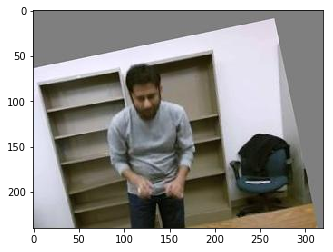

In [7]:
imagenet = True
## list directory of output transformed images
transformed_dir = "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_232753_00_Video_Aug_v1/"
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part2_layout_p09/20151114_022008_00_Video_Aug0/"
# "/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video_Aug0/"

tx_imgs = [im for im in sorted(os.listdir(transformed_dir)) if im.endswith('.jpg')]
print("tx_imgs len and [0]", len(tx_imgs), tx_imgs[0])

image_idx = 5

# original image 240x320
test_image_file_path = os.path.join(transformed_dir, tx_imgs[image_idx])
print("test_image_file_path", test_image_file_path)

original_image = cv2.imread(test_image_file_path)  # B,G,R order
rgb_image = original_image[:,:,[2,1,0]]
down_image = pyramid_reduce(rgb_image, downscale=8)

print("original transformed rgb image =")
plt.figure(0)
plt.imshow(rgb_image)  
plt.show()

    

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_232753_00_Video_Aug_v1/20151116_232753_00_Video_vfr_1000_skfr_994_aug_2_heatmap30x40.npy
test heatmap shape (30, 40, 25)
heatmap test for seq 0


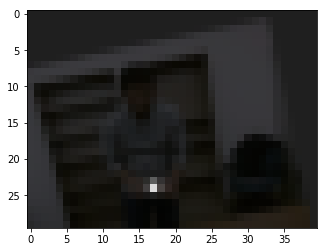

heatmap test for seq 1


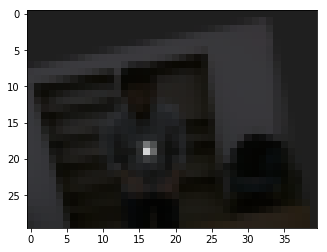

heatmap test for seq 2


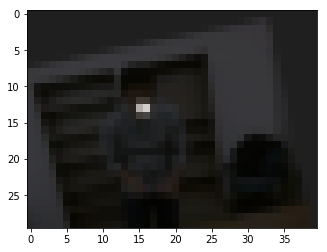

heatmap test for seq 3


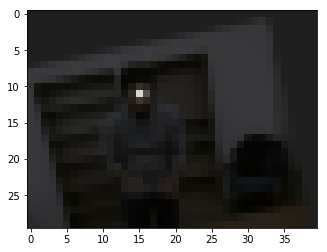

heatmap test for seq 4


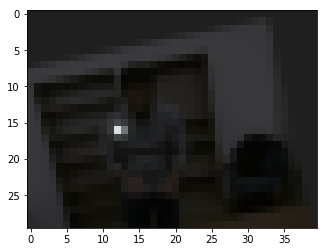

heatmap test for seq 5


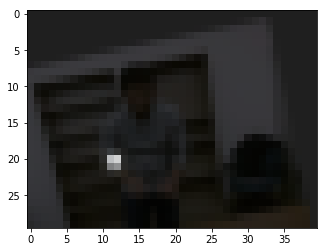

heatmap test for seq 6


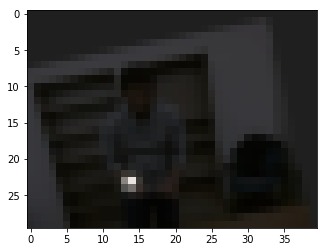

heatmap test for seq 7


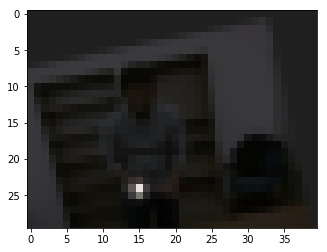

heatmap test for seq 8


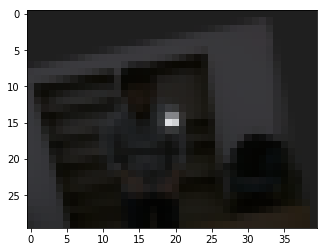

heatmap test for seq 9


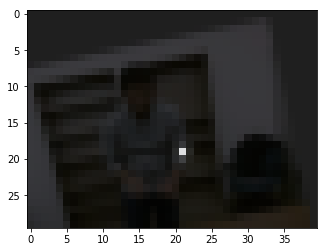

heatmap test for seq 10


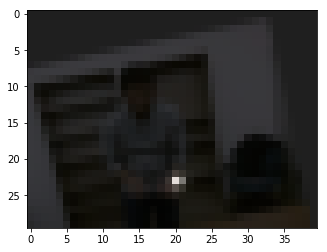

heatmap test for seq 11


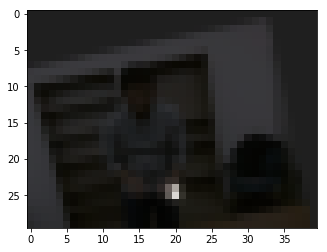

heatmap test for seq 12


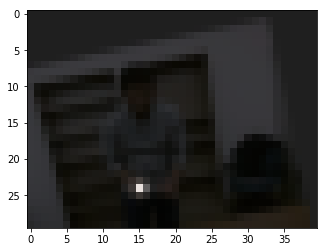

heatmap test for seq 13


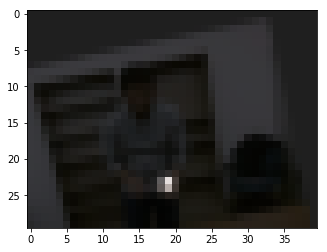

heatmap test for seq 14


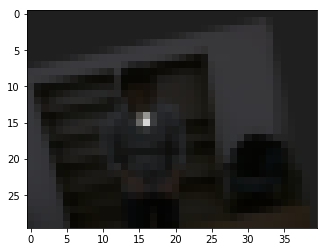

heatmap test for seq 15


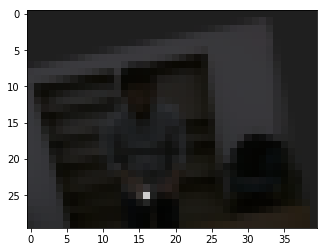

heatmap test for seq 16


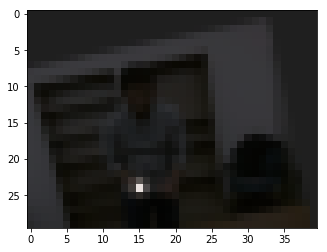

heatmap test for seq 17


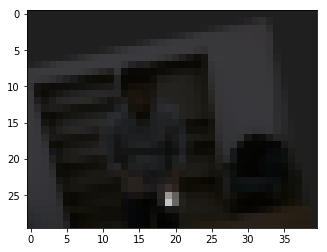

heatmap test for seq 18


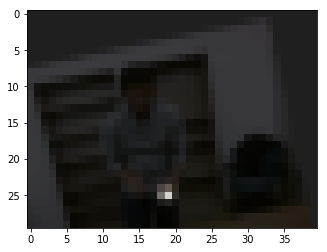

heatmap test for seq 19


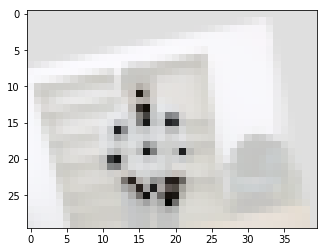

heatmap test for seq 20


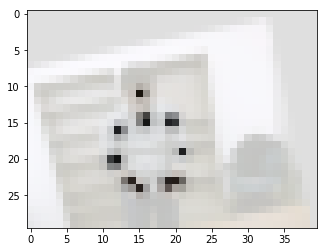

heatmap test for seq 21


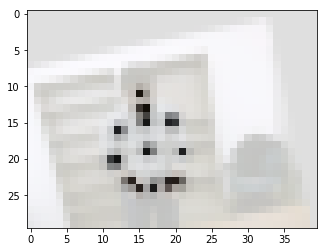

heatmap test for seq 22


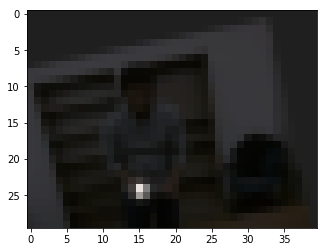

heatmap test for seq 23


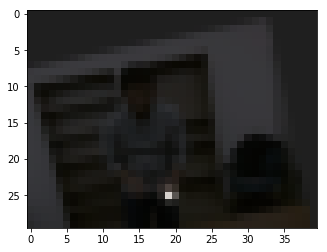

heatmap test for seq 24


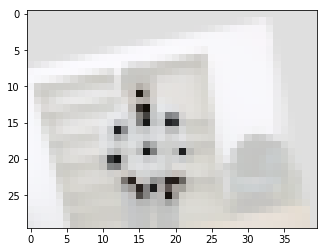

RGB image


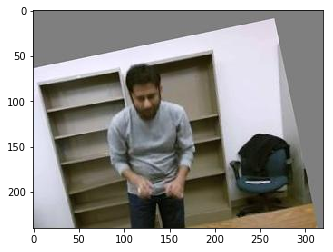

In [8]:
# show heatmaps

test_heatmap_file_path = test_image_file_path.replace("240x320", "heatmap30x40").replace(".jpg", ".npy")
print(test_heatmap_file_path)

gt_heatmap_file_path = test_heatmap_file_path

test_heatmap = np.load(test_heatmap_file_path)
print("test heatmap shape", test_heatmap.shape)  # (30, 40, 20)
gt_heatmap = np.load(gt_heatmap_file_path)

images = []  # a list containing alternated test_hm and gt_hm
titles = []  # titles for images above
len_hm = test_heatmap.shape[2]


# for i in range(test_heatmap.shape[2]):
# #     if i == test_heatmap.shape[2] - 1:
#     #2 faster
#     images.append(gt_heatmap[:,:,i])  #
#     images.append(test_heatmap[:,:,i])  #
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')

#     show_images(images, 1, titles)
#     images = []
#     titles = []

for i in range(test_heatmap.shape[2]):
    print("heatmap test for seq", i)
#     parray = gt_heatmap[:,:,i]
#     parray[parray<0.001] = 0
#     pprint.pprint(parray)
    plt.figure()
    plt.imshow(gt_heatmap[:,:,i], cmap=plt.get_cmap('gray'))
    plt.imshow(down_image, alpha=0.25)
    plt.show()


# bk_hm = test_heatmap[:,:,len_hm-1]
# print("bk_hm shape", bk_hm.shape)

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

# print("heatmap test")
# plt.figure(5)
# plt.imshow(bk_hm, cmap=plt.get_cmap('gray'))
# plt.imshow(down_image, alpha=0.25)
# plt.show()
    


/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm/s07/part1_layout_p14/20151116_232753_00_Video_Aug_v1/20151116_232753_00_Video_vfr_1000_skfr_994_aug_2_paf30x40.npy
test paf shape (30, 40, 46)
(46,)


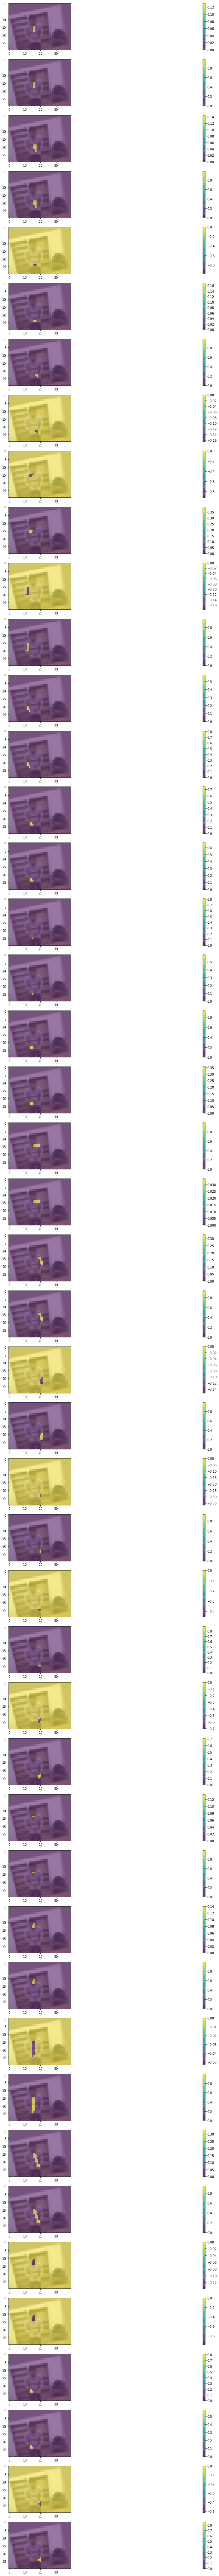

i--------------------- 0
array([[0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    , 0.    , 0.   

array([[ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ],
       [ 0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,  0.    ,
         0.    ,  0.    ,  0.    ,  0.  

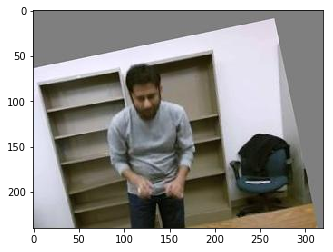

paf test


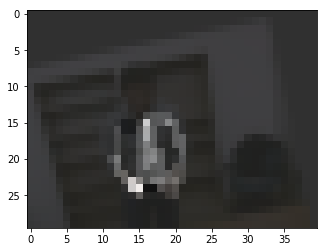

In [9]:
# show pafs

# test_paf_file_path = os.path.join(test_raw_data_path, test_file_pre + '_paf30x40.npy')
test_paf_file_path = test_image_file_path.replace("240x320", "paf30x40").replace(".jpg", ".npy")
print(test_paf_file_path)

gt_paf_file_path = test_paf_file_path

test_paf = np.load(test_paf_file_path)
print("test paf shape", test_paf.shape)  # (30, 40, 36)
gt_paf = np.load(gt_paf_file_path)

summed_test_paf = np.sum(test_paf, axis=2)
summed_gt_paf = np.sum(gt_paf, axis=2)
# summed_pafx = np.zeros((paf.shape[0], paf.shape[1]))
# summed_pafy = np.zeros((paf.shape[0], paf.shape[1]))

images = []  # a list containing alternated test_paf and gt_paf
titles = []  # titles for images above

##############
fig, ax = plt.subplots(nrows=test_paf.shape[2], ncols=1)
print(ax.shape)
fig.set_size_inches((150, 150))

for i in range(test_paf.shape[2]):
    
#     #2  faster!
#     images.append(gt_paf[:,:,i])
#     images.append(test_paf[:,:,i])
#     images.append(rgb_image)

#     titles.append('GT_' + str(i))
#     titles.append('TEST_' + str(i))
#     titles.append('rgb image')
    
#     show_images(images, 1, titles)
#     images = []
#     titles = []
    
    #3 better
    ax[i].imshow(down_image, alpha=.70)
    ax_h = ax[i].imshow(test_paf[:,:,i], alpha=.50)
#     ax[i][j].set(xlabel=x_label, ylabel=y_label, title=joints[p])
    fig.colorbar(ax_h, ax=ax[i])

plt.show()
###############

# for i in range(test_paf.shape[2]):
#     print("i---------------------\n", test_paf[:,:,i])

for i in range(test_paf.shape[2]):
    print("i---------------------", i)
    pprint.pprint(test_paf[:,:,i])
    
# original image
# images.append(rgb_image)
# titles.append('rgb image')
# print("images len", len(images))
# start_t = time.time()
# # show_images(images, 38, titles)
# end_t = time.time()

print("RGB image")
plt.figure(2)
plt.imshow(rgb_image, alpha=1)
plt.show()

print("paf test")
plt.figure(4)
plt.imshow(summed_test_paf, cmap=plt.get_cmap('gray'))
plt.imshow(down_image, alpha=0.15)
plt.show()

# print("paf gt")
# plt.figure(5)
# plt.imshow(summed_gt_paf, cmap=plt.get_cmap('gray'))  
# plt.show()

avg_l_idx = 22
avg_r_idx = 23
    
paf_pairs_indices = [[1, 14], [0, 1], [12, 0], [13, 0], 
                    [4, 14], [5, 4], [6, 5], [7, 6], [15, 7], [16, 6],
                    [8, 14], [9, 8], [10, 9], [11, 10], [17, 11], [18, 10],
                    [14, 2], [2, 3],
                    [12, 14], [13, 14], [3, 14],  # for having pafs common with coco
                    [6, avg_l_idx], [10, avg_r_idx]  # pafs for wrist joints to corresponding averaged hand joints
                    ]




In [21]:
# numpy reading keypoints

test_kp_file_path = test_image_file_path.replace("_240x320", "").replace(".jpg", ".npy")
print(test_kp_file_path)

kp = np.load(test_kp_file_path)
print("kp shape", kp.shape, kp)

/s/red/b/nobackup/data/eggnog_cpm/eggnog_cpm_test/s05/part1_layout_p10/20151114_014811_00_Video/20151114_014811_00_Video_vfr_0_skfr_0.npy
kp shape (57,) [0.0000e+00 9.8391e+02 6.1303e+02 0.0000e+00 9.8066e+02 4.1440e+02
 0.0000e+00 9.7757e+02 2.1139e+02 1.0000e+00 9.8103e+02 1.0145e+02
 2.0000e+00 8.5309e+02 2.8869e+02 2.0000e+00 8.2200e+02 4.4836e+02
 2.0000e+00 8.6523e+02 5.9225e+02 2.0000e+00 9.0547e+02 6.0216e+02
 2.0000e+00 1.1064e+03 2.8552e+02 2.0000e+00 1.1434e+03 4.4247e+02
 2.0000e+00 1.0335e+03 5.7066e+02 2.0000e+00 9.8895e+02 6.0271e+02
 2.0000e+00 9.3055e+02 6.1397e+02 2.0000e+00 1.0386e+03 6.1211e+02
 2.0000e+00 9.7831e+02 2.6260e+02 2.0000e+00 9.1243e+02 6.2754e+02
 2.0000e+00 8.8679e+02 6.0595e+02 2.0000e+00 9.9510e+02 6.6639e+02
 2.0000e+00 1.0159e+03 6.3055e+02]
